In [2]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)


%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Linear

In [11]:
num_meta_epochs = 10#10
num_epochs = 50#15#5#25#50
seed = 42#45#42

num_samples = 150
dataset_params = {'seed':seed,'num_samples':num_samples}

learning_rate = 1/num_epochs
num_neurons = [5,3,2]
activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,'activations':activations,'num_neurons':num_neurons}#{'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}



experiment started at 2018-08-07 20:45:54.462811


/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py:24: RuntimeWarning: divide by zero encountered in log
  logs = np.log(x)


experiment number 1 took 5.499859094619751 seconds. That means the whole run will probably take 54.99859094619751 more seconds and 0.9166431824366251 more minutes.
overall, it took 48.93977212905884 seconds with 10 experiments
          cobeau   coverage       nlpd       rsme
count  10.000000  10.000000  10.000000  10.000000
mean    0.419882   0.400000        inf   0.022280
std     0.394908   0.129577        NaN   0.015410
min     0.004155   0.133333  -2.538205   0.007428
25%     0.056414   0.350000        inf   0.010923
50%     0.346765   0.422222        inf   0.015033
75%     0.765631   0.505556        inf   0.032143
max     0.961289   0.533333        inf   0.049810
\begin{tabular}{lrrrr}
\toprule
{} &     cobeau &   coverage &       nlpd &       rsme \\
\midrule
count &  10.000000 &  10.000000 &  10.000000 &  10.000000 \\
mean  &   0.419882 &   0.400000 &        inf &   0.022280 \\
std   &   0.394908 &   0.129577 &        NaN &   0.015410 \\
min   &   0.004155 &   0.133333 &  -2.538

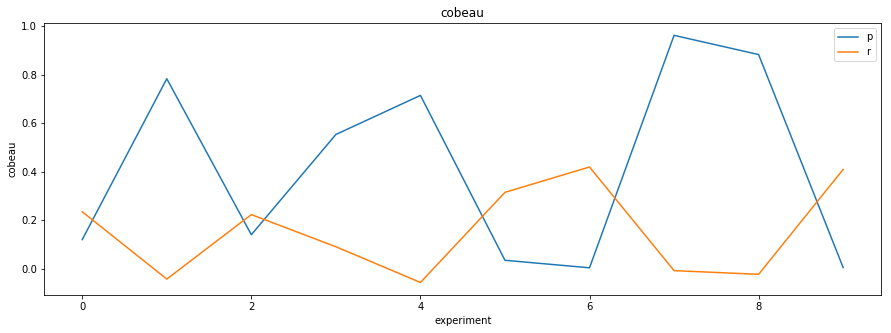

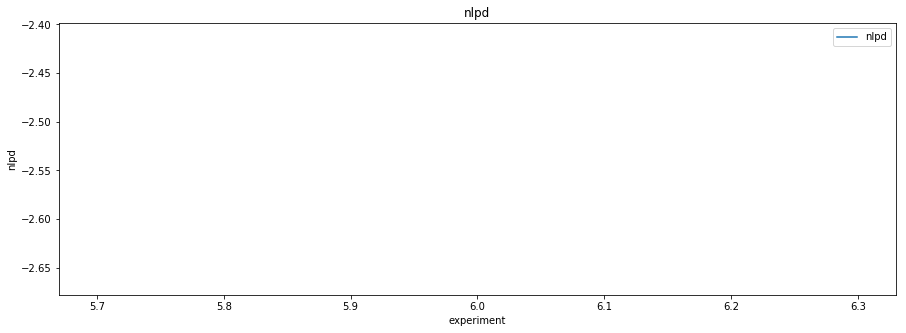

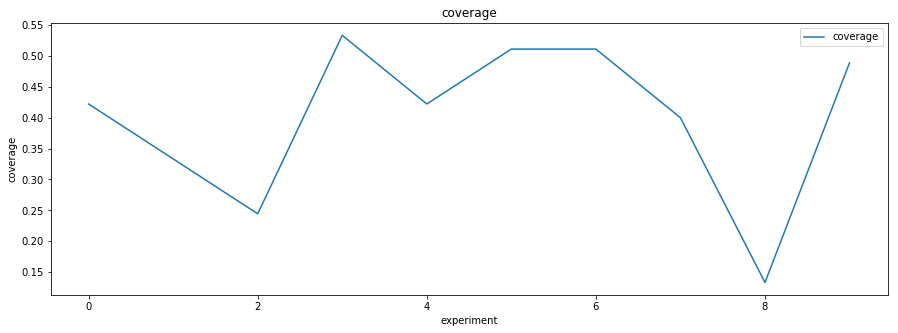

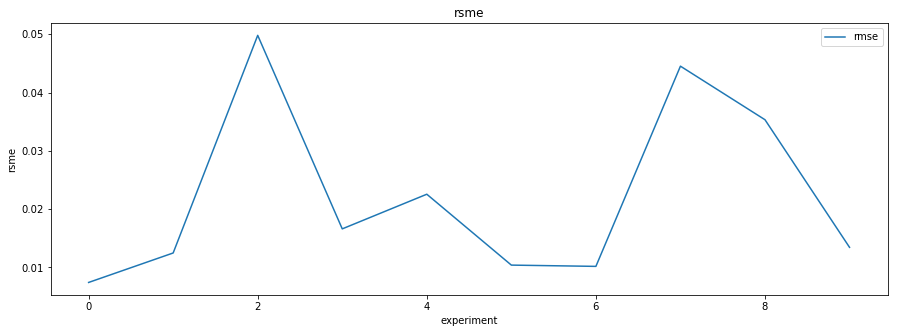

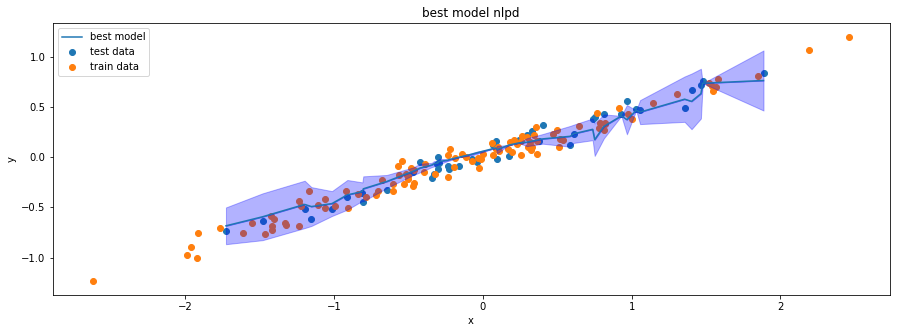

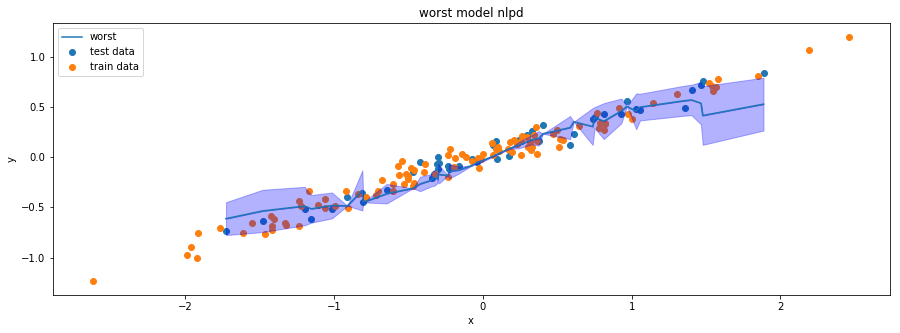

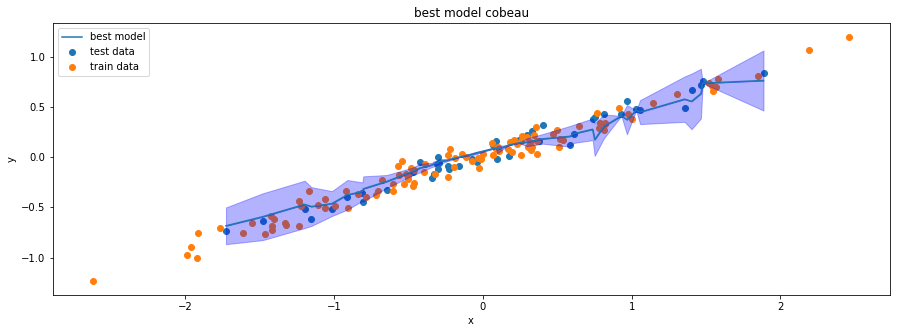

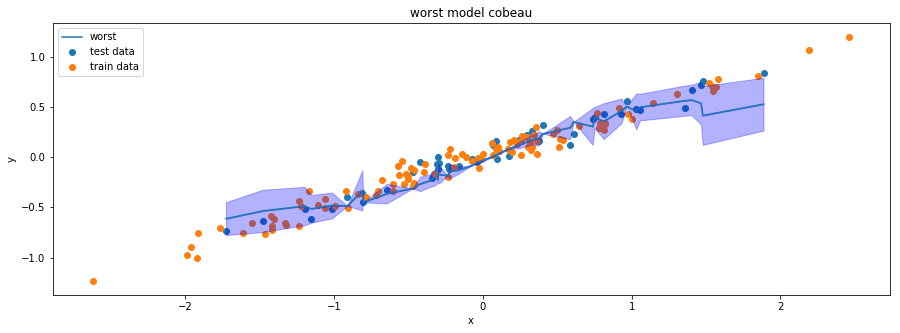

In [12]:
pd = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-07 20:46:48.273470
experiment number 1 took 4.563168048858643 seconds. That means the whole run will probably take 45.631680488586426 more seconds and 0.7605280081431071 more minutes.
overall, it took 45.19432783126831 seconds with 10 experiments
             cobeau   coverage       nlpd       rsme
count  1.000000e+01  10.000000  10.000000  10.000000
mean   8.716244e-02   0.753333   0.609499   0.082355
std    2.135920e-01   0.170997   0.386277   0.140734
min    6.701849e-09   0.488889  -0.260997   0.010740
25%    6.381464e-06   0.655556   0.430015   0.021017
50%    8.598741e-05   0.777778   0.705561   0.036938
75%    1.699512e-02   0.866667   0.847789   0.060313
max    6.753077e-01   0.977778   1.079094   0.477270
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &   coverage &       nlpd &       rsme \\
\midrule
count &  1.000000e+01 &  10.000000 &  10.000000 &  10.000000 \\
mean  &  8.716244e-02 &   0.753333 &   0.609499 &   0.082355 \\
std   &  2.13592

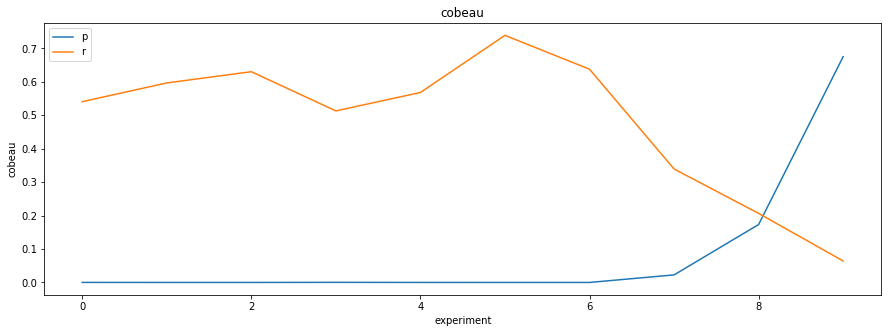

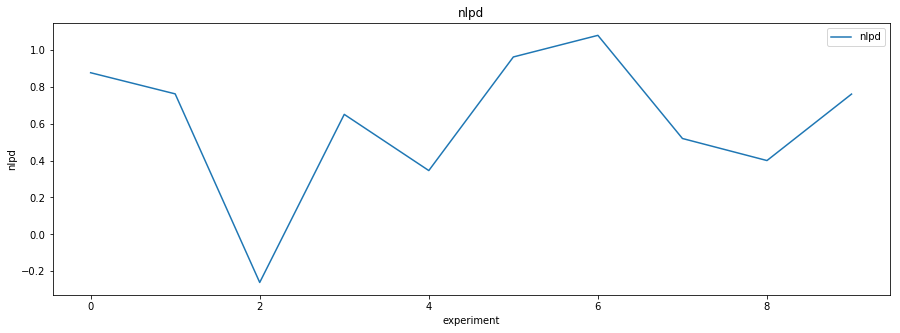

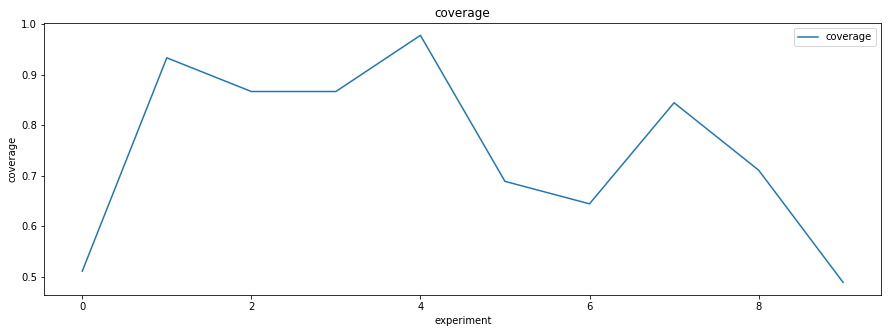

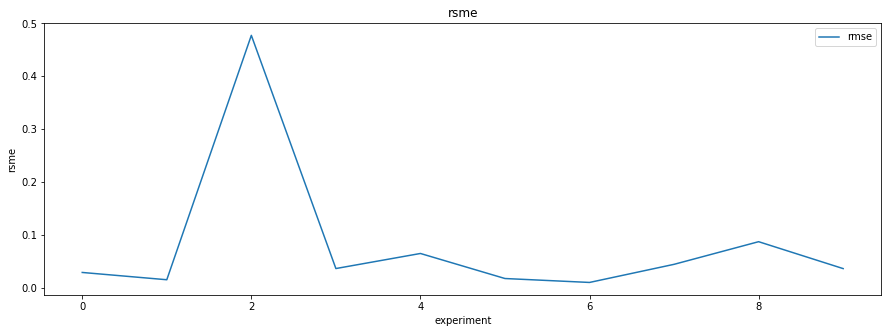

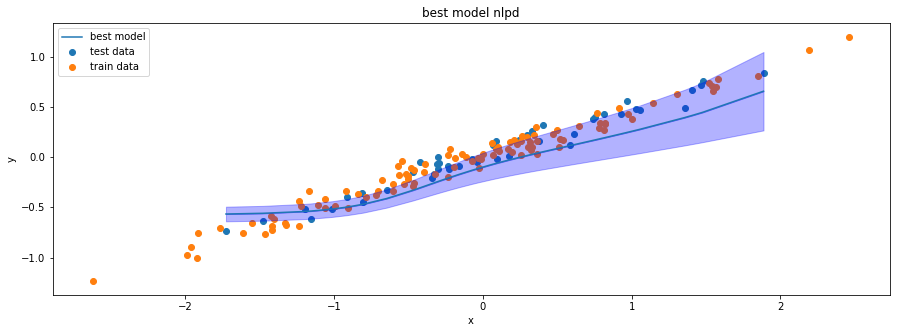

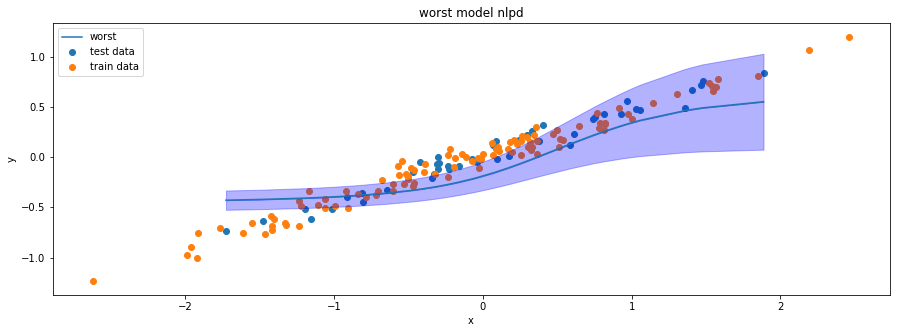

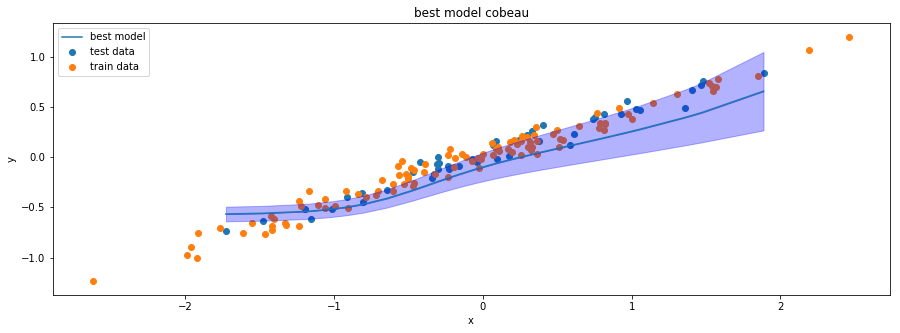

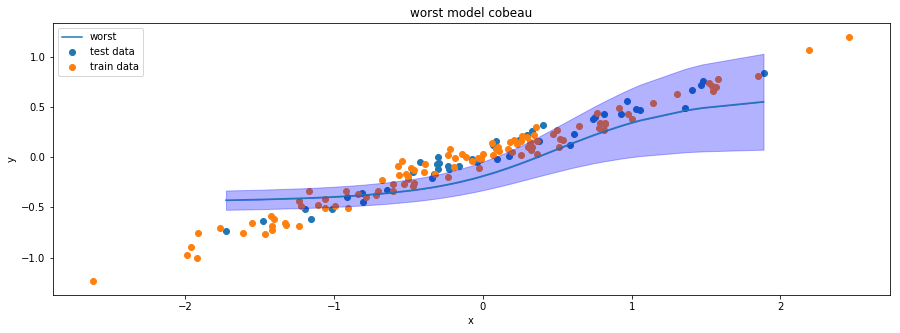

In [13]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-07 20:47:38.408252
experiment number 1 took 4.607220888137817 seconds. That means the whole run will probably take 46.072208881378174 more seconds and 0.7678701480229696 more minutes.
overall, it took 45.86866998672485 seconds with 10 experiments
             cobeau   coverage       nlpd       rsme
count  1.000000e+01  10.000000  10.000000  10.000000
mean   6.782229e-02   0.888889   0.438188   0.065961
std    1.278894e-01   0.122166   0.241136   0.050458
min    6.148781e-13   0.622222  -0.085884   0.011783
25%    1.002969e-04   0.872222   0.334282   0.029851
50%    2.034037e-03   0.933333   0.493734   0.047587
75%    1.028551e-01   0.966667   0.618170   0.095188
max    3.947899e-01   1.000000   0.702770   0.167582
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &   coverage &       nlpd &       rsme \\
\midrule
count &  1.000000e+01 &  10.000000 &  10.000000 &  10.000000 \\
mean  &  6.782229e-02 &   0.888889 &   0.438188 &   0.065961 \\
std   &  1.27889

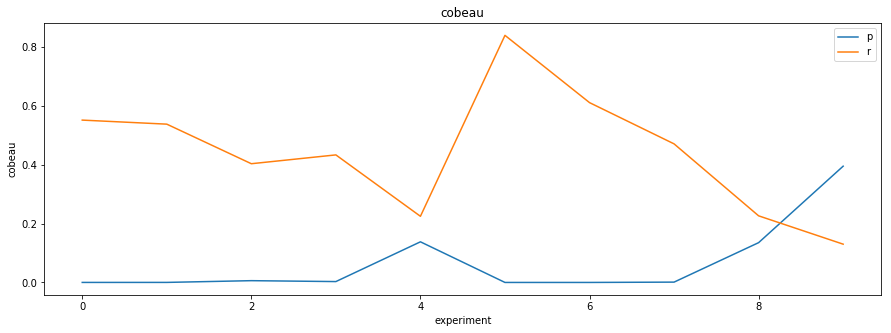

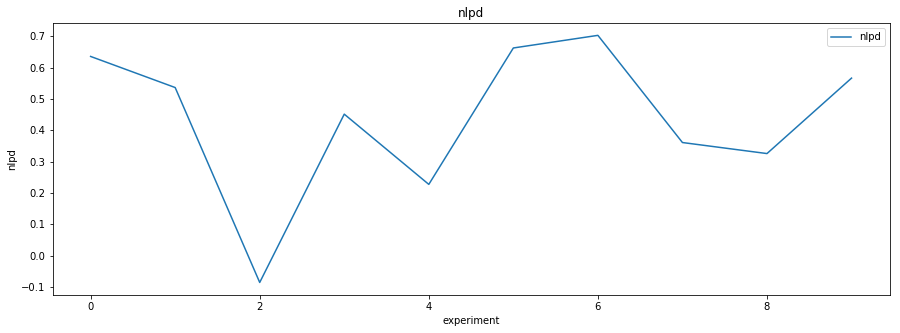

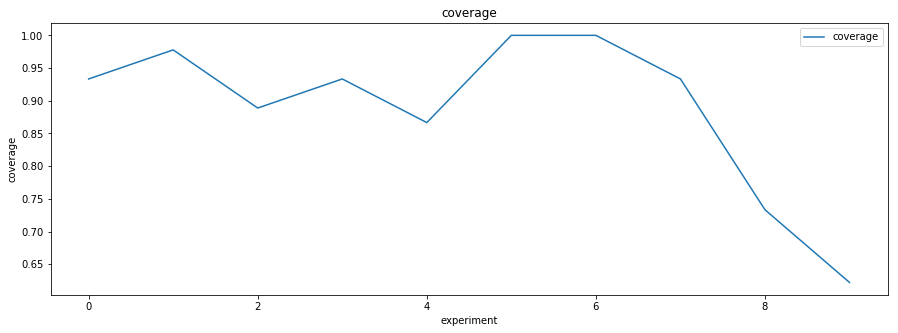

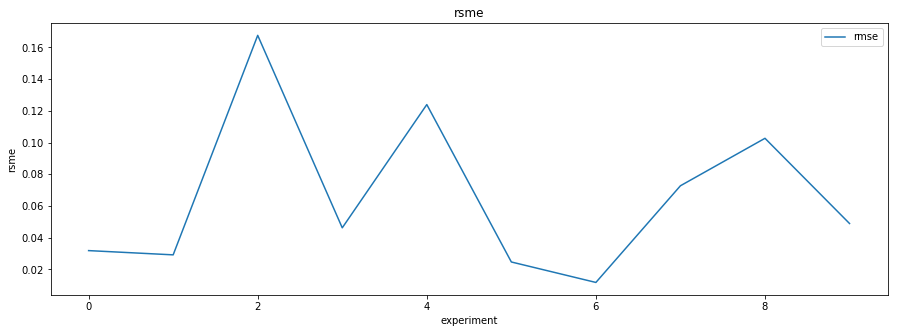

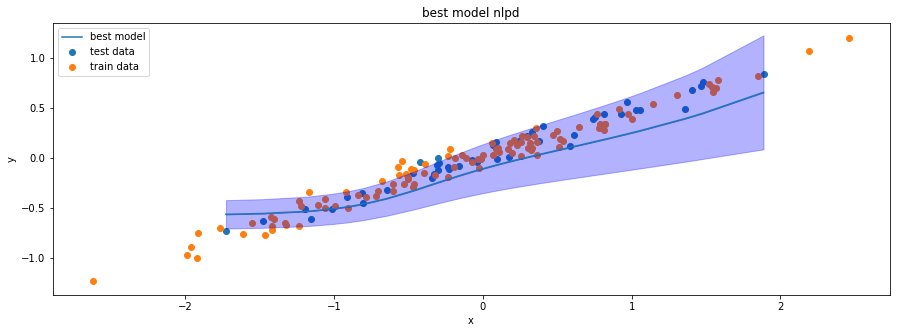

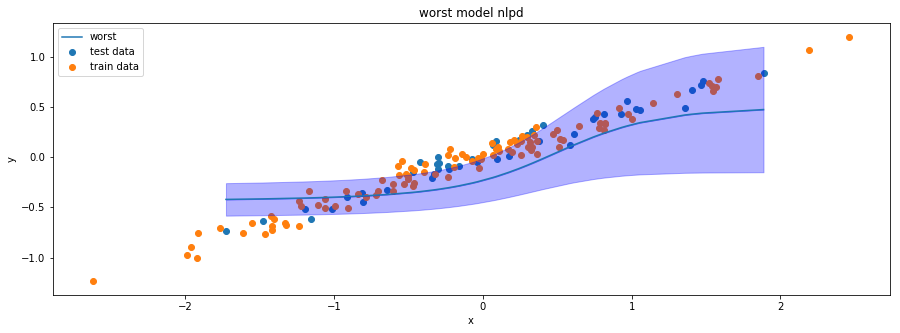

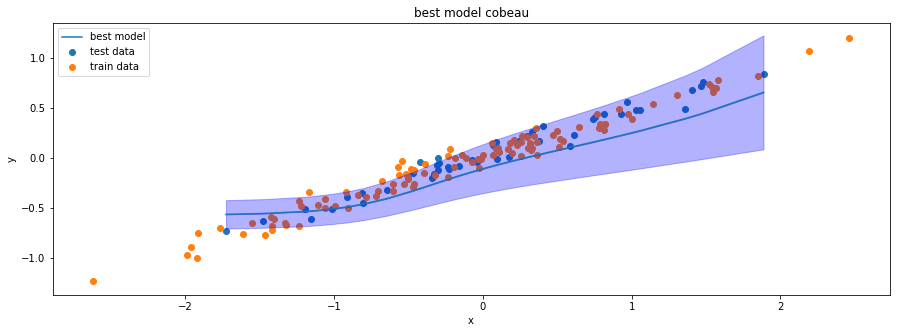

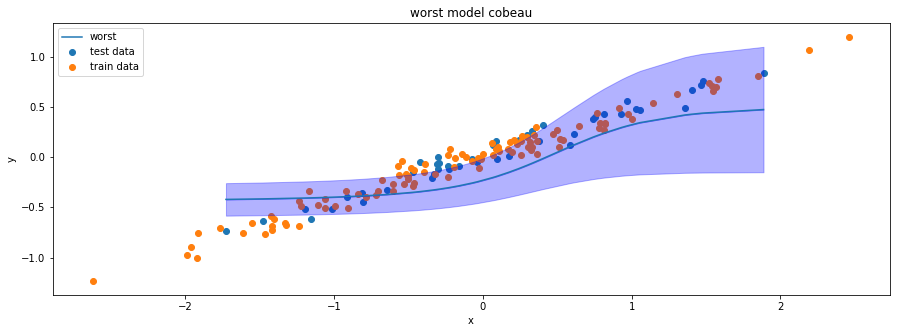

In [14]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [15]:
num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':[4, 5,5, 4, 2]}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = 1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,'num_epochs':num_epochs,'seed':seed}#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-07 20:48:29.176429


/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py:24: RuntimeWarning: divide by zero encountered in log
  logs = np.log(x)


experiment number 1 took 16.535935878753662 seconds. That means the whole run will probably take 82.67967939376831 more seconds and 1.3779946565628052 more minutes.
overall, it took 95.44967699050903 seconds with 5 experiments


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


         cobeau  coverage      nlpd      rsme
count  5.000000  5.000000  5.000000  5.000000
mean   0.491041  0.413333       inf  0.044719
std    0.384128  0.132031       NaN  0.014932
min    0.005399  0.266667       inf  0.029046
25%    0.187693  0.333333       NaN  0.036777
50%    0.613598  0.377778       NaN  0.037604
75%    0.711874  0.488889       NaN  0.054585
max    0.936642  0.600000       inf  0.065581
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  5.000000 &  5.000000 &  5.000000 &  5.000000 \\
mean  &  0.491041 &  0.413333 &       inf &  0.044719 \\
std   &  0.384128 &  0.132031 &       NaN &  0.014932 \\
min   &  0.005399 &  0.266667 &       inf &  0.029046 \\
25\%   &  0.187693 &  0.333333 &       NaN &  0.036777 \\
50\%   &  0.613598 &  0.377778 &       NaN &  0.037604 \\
75\%   &  0.711874 &  0.488889 &       NaN &  0.054585 \\
max   &  0.936642 &  0.600000 &       inf &  0.065581 \\
\bottomrule
\end{tabular}



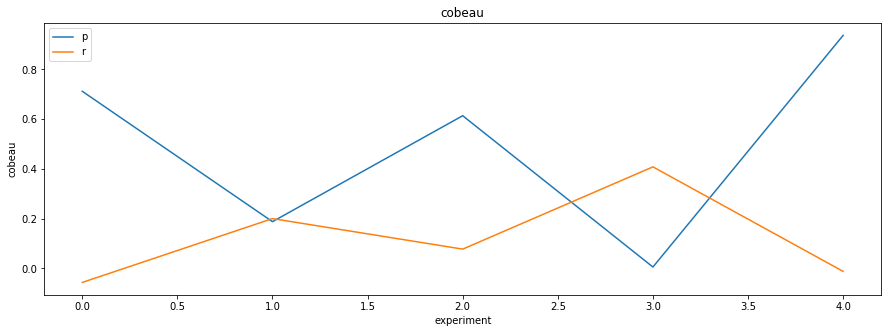

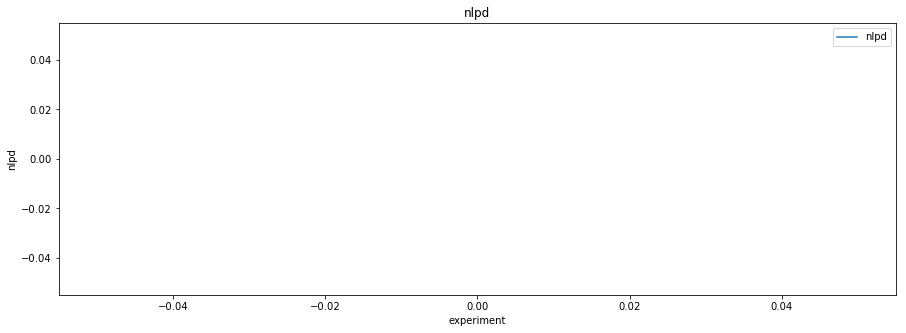

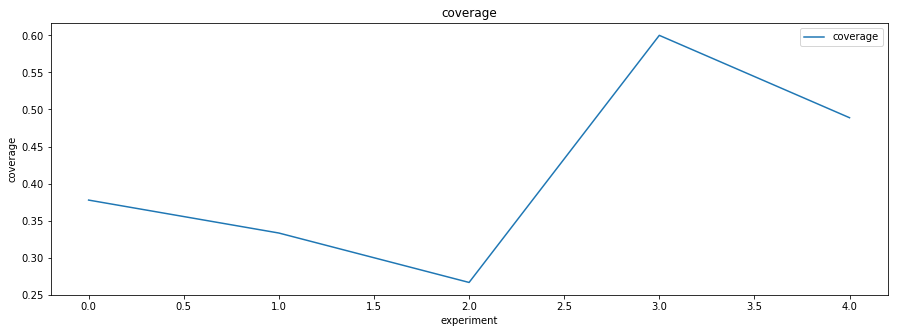

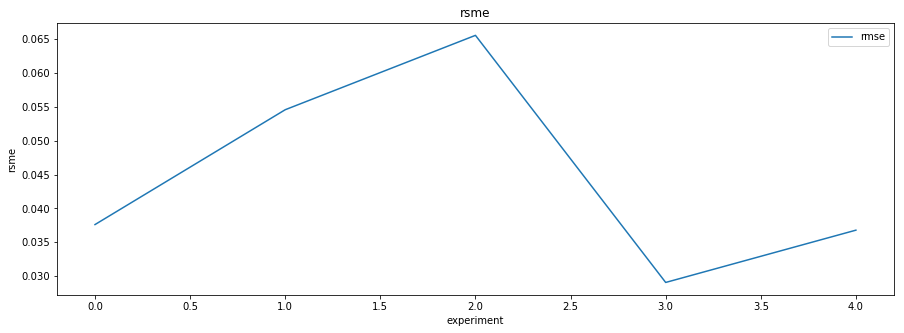

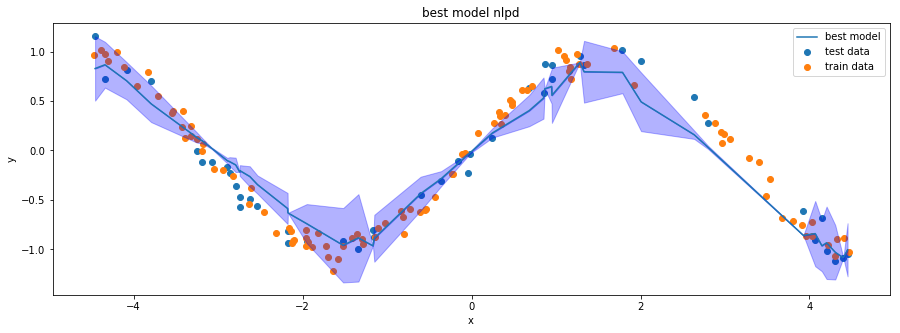

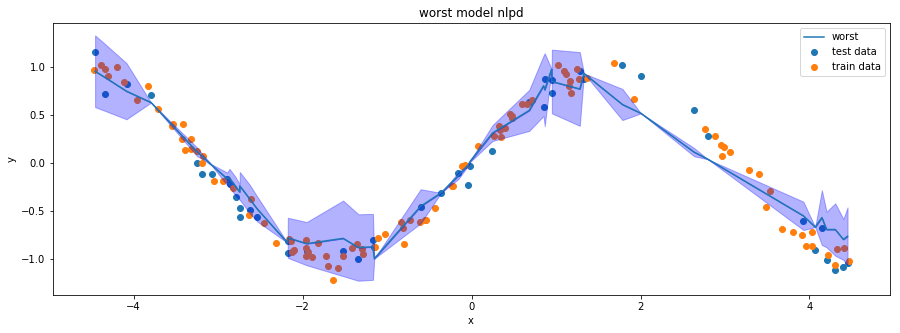

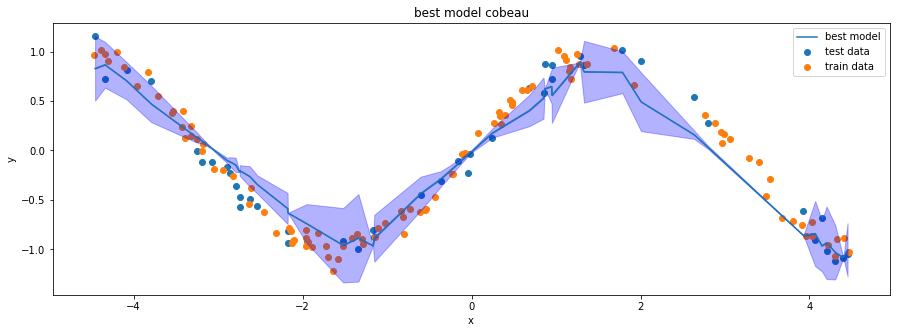

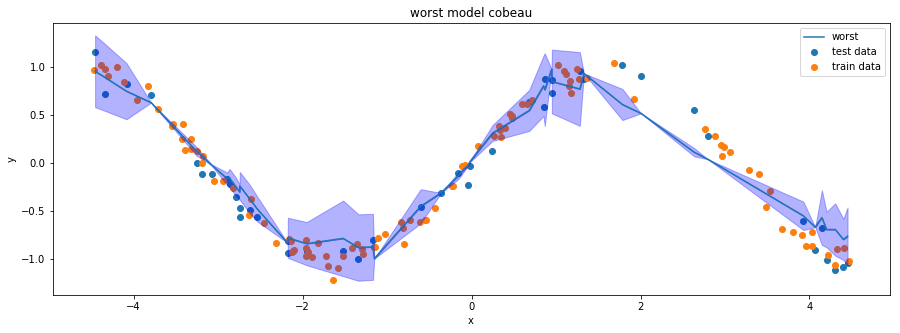

In [16]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-07 20:50:10.167384
experiment number 1 took 26.096895933151245 seconds. That means the whole run will probably take 130.48447966575623 more seconds and 2.1747413277626038 more minutes.
overall, it took 129.3714199066162 seconds with 5 experiments
         cobeau  coverage      nlpd      rsme
count  5.000000  5.000000  5.000000  5.000000
mean   0.220032  0.151111 -1.203053  0.147207
std    0.436668  0.150226  4.177398  0.215279
min    0.000092  0.022222 -8.513534  0.018222
25%    0.005360  0.066667 -0.285687  0.023298
50%    0.035712  0.088889 -0.195347  0.046561
75%    0.058996  0.177778  1.465886  0.123020
max    1.000000  0.400000  1.513420  0.524931
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  5.000000 &  5.000000 &  5.000000 &  5.000000 \\
mean  &  0.220032 &  0.151111 & -1.203053 &  0.147207 \\
std   &  0.436668 &  0.150226 &  4.177398 &  0.215279 \\
min   &  0.000092 &  0.022222 & -8.513534 &

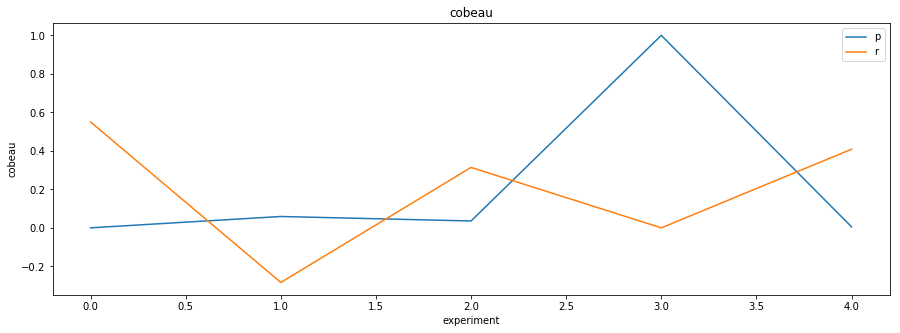

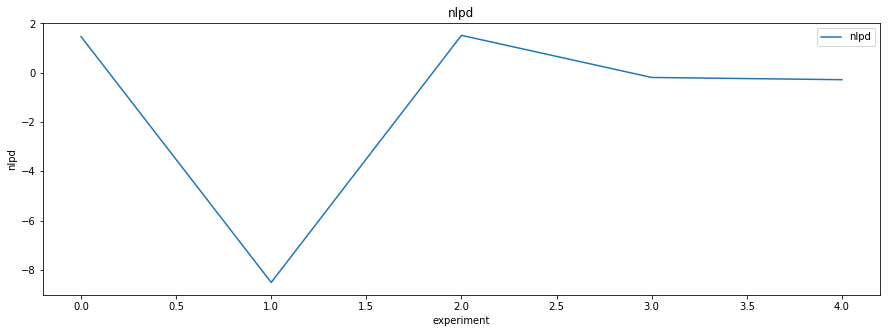

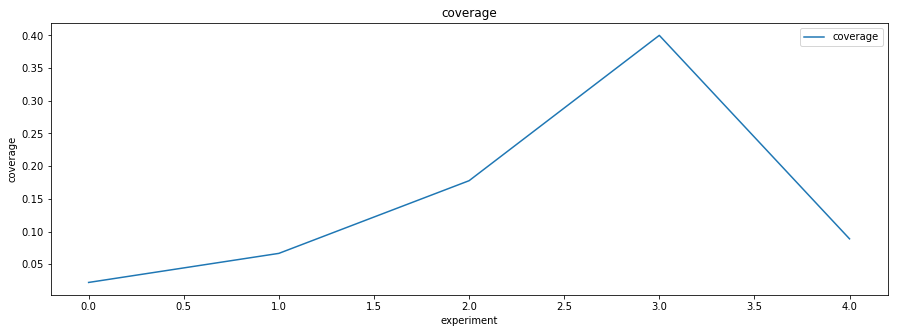

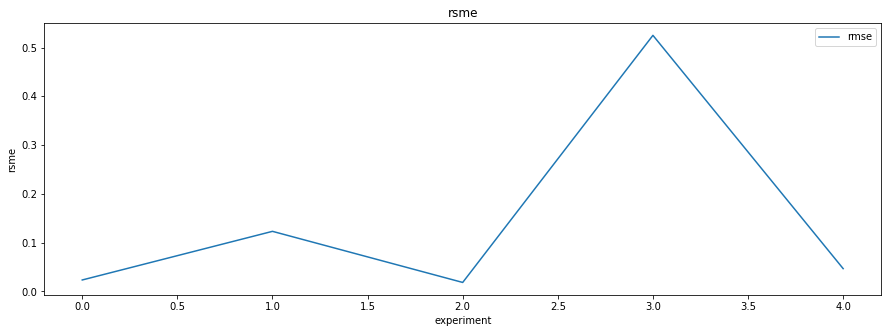

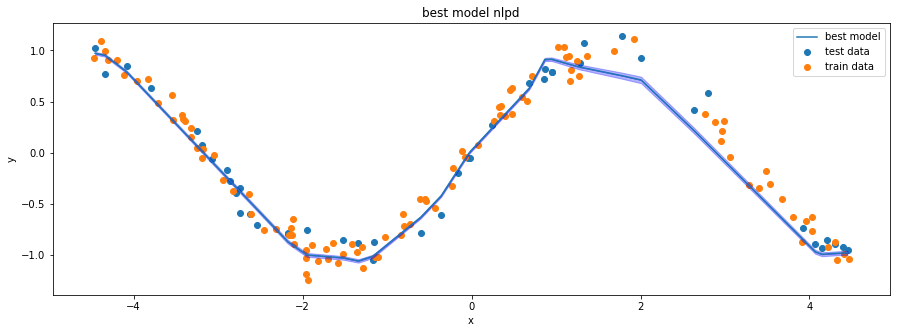

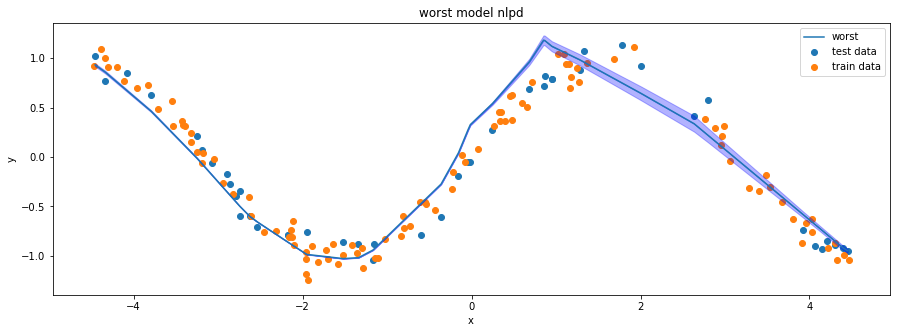

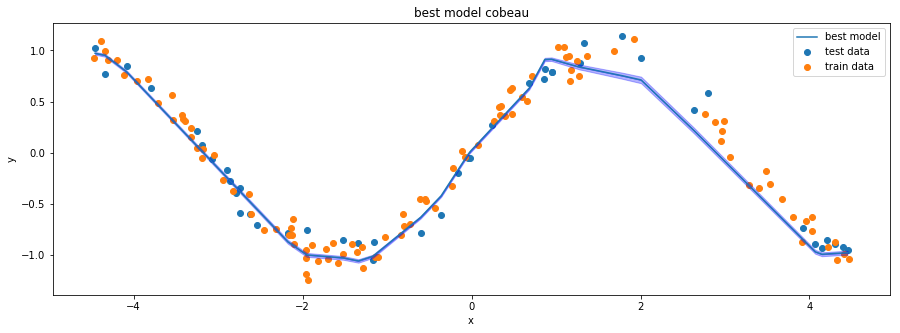

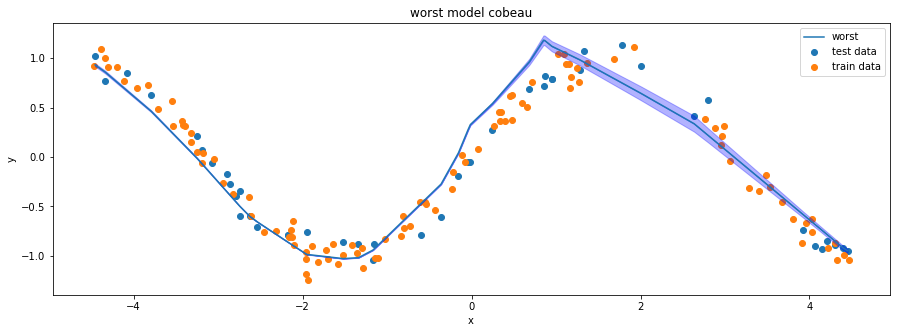

In [17]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-07 20:52:24.814279
experiment number 1 took 24.460687160491943 seconds. That means the whole run will probably take 122.30343580245972 more seconds and 2.038390596707662 more minutes.
overall, it took 141.17763590812683 seconds with 5 experiments
             cobeau  coverage      nlpd      rsme
count  5.000000e+00  5.000000  5.000000  5.000000
mean   2.090617e-01  0.097778  0.997587  0.024492
std    3.349260e-01  0.060041  0.634475  0.012211
min    2.230430e-10  0.044444 -0.095446  0.014693
25%    4.616027e-03  0.066667  1.065875  0.016785
50%    6.483232e-03  0.088889  1.164961  0.022105
75%    2.598325e-01  0.088889  1.338835  0.023543
max    7.743769e-01  0.200000  1.513712  0.045335
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  5.000000e+00 &  5.000000 &  5.000000 &  5.000000 \\
mean  &  2.090617e-01 &  0.097778 &  0.997587 &  0.024492 \\
std   &  3.349260e-01 &  0.060041 &  0.634475 &  0.0

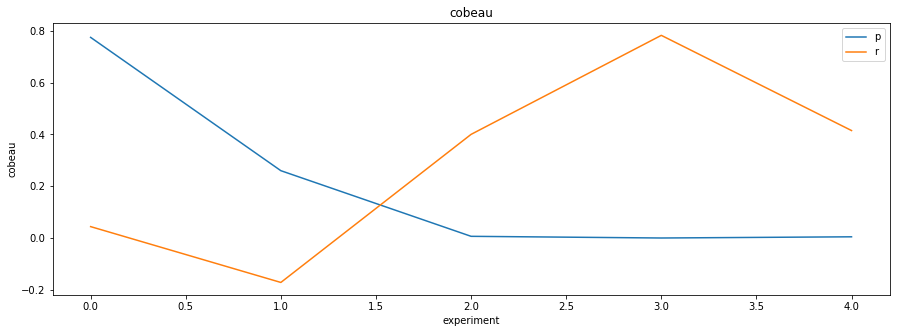

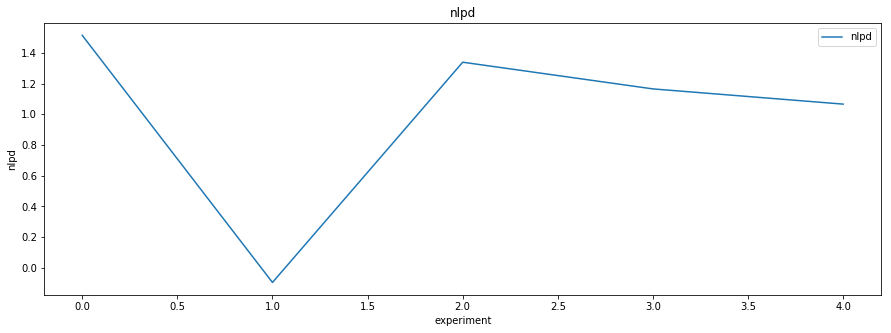

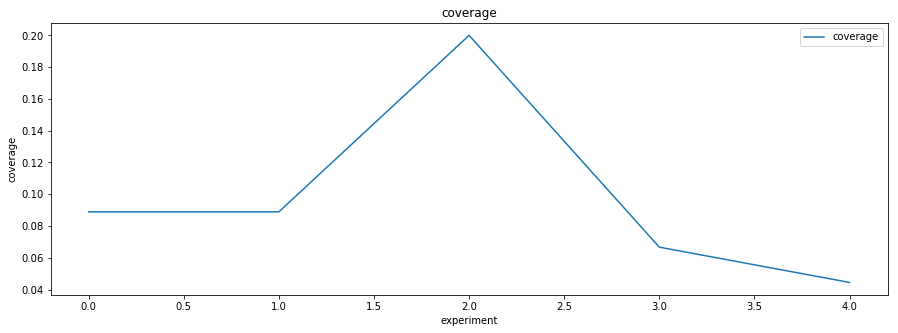

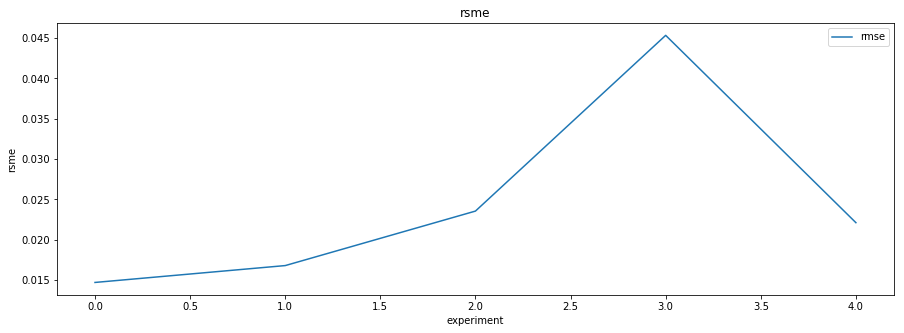

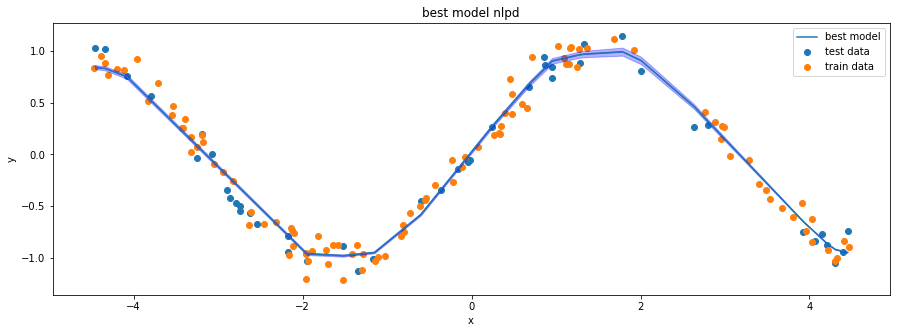

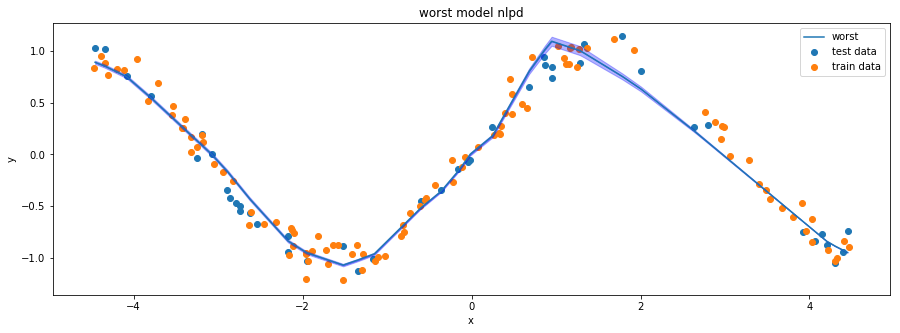

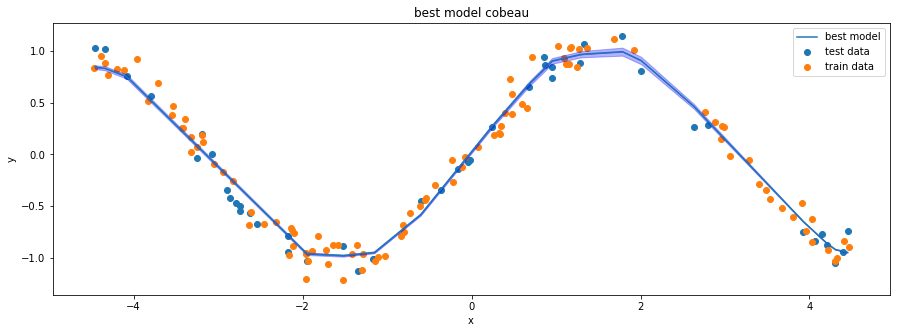

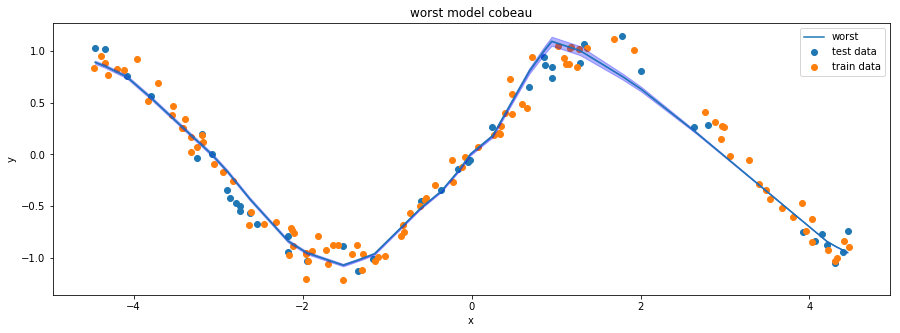

In [18]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [19]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-07 20:54:53.494338


/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py:24: RuntimeWarning: divide by zero encountered in log
  logs = np.log(x)


experiment number 1 took 23.085328102111816 seconds. That means the whole run will probably take 115.42664051055908 more seconds and 1.9237773418426514 more minutes.
overall, it took 128.20555901527405 seconds with 5 experiments


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


             cobeau  coverage      nlpd       rsme
count  5.000000e+00  5.000000  5.000000   5.000000
mean   6.128902e-04  0.244444       inf  48.919482
std    1.004413e-03  0.035136       NaN  11.476744
min    7.718797e-08  0.200000       inf  35.663824
25%    1.565835e-07  0.222222       NaN  40.038018
50%    9.858990e-05  0.244444       NaN  48.221245
75%    6.149543e-04  0.266667       NaN  57.986061
max    2.350673e-03  0.288889       inf  62.688262
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  5.000000e+00 &  5.000000 &  5.000000 &   5.000000 \\
mean  &  6.128902e-04 &  0.244444 &       inf &  48.919482 \\
std   &  1.004413e-03 &  0.035136 &       NaN &  11.476744 \\
min   &  7.718797e-08 &  0.200000 &       inf &  35.663824 \\
25\%   &  1.565835e-07 &  0.222222 &       NaN &  40.038018 \\
50\%   &  9.858990e-05 &  0.244444 &       NaN &  48.221245 \\
75\%   &  6.149543e-04 &  0.266667 &       NaN &  57.986061 \\
max 

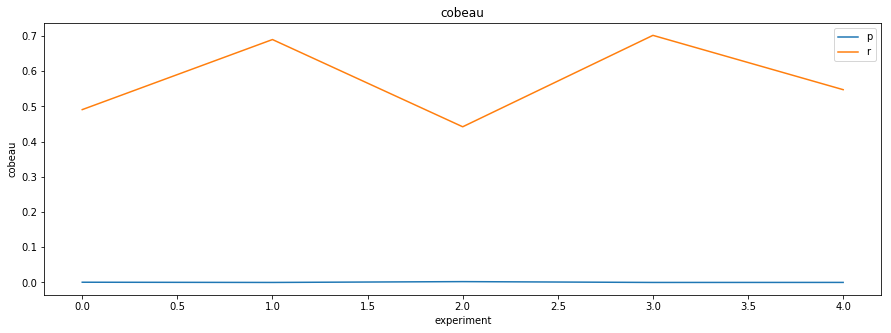

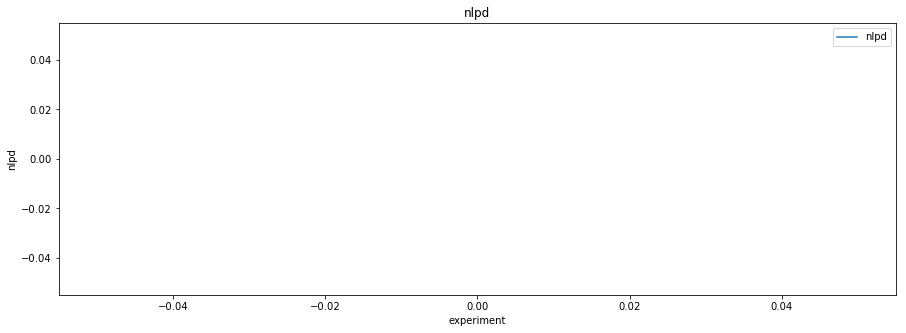

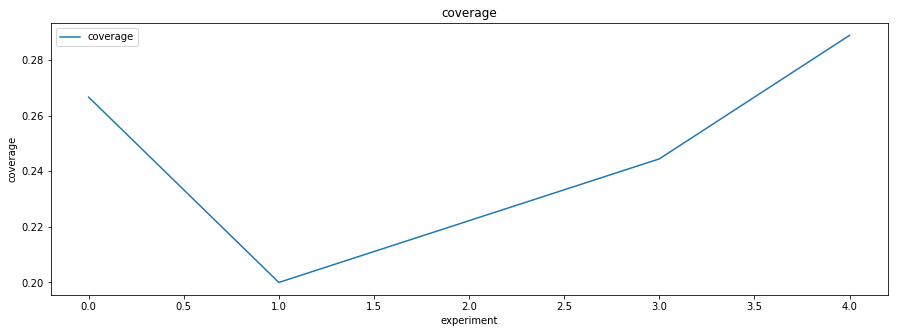

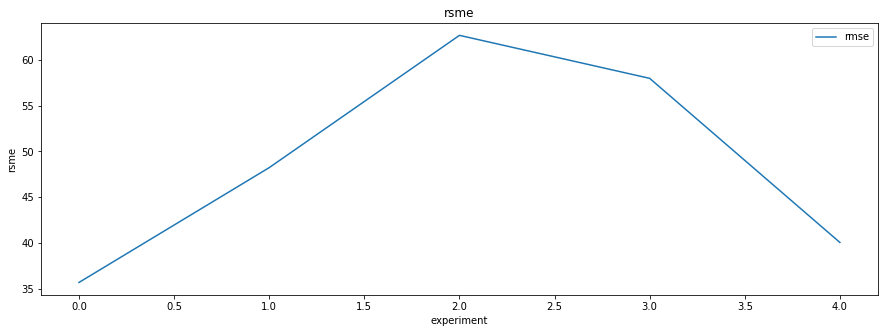

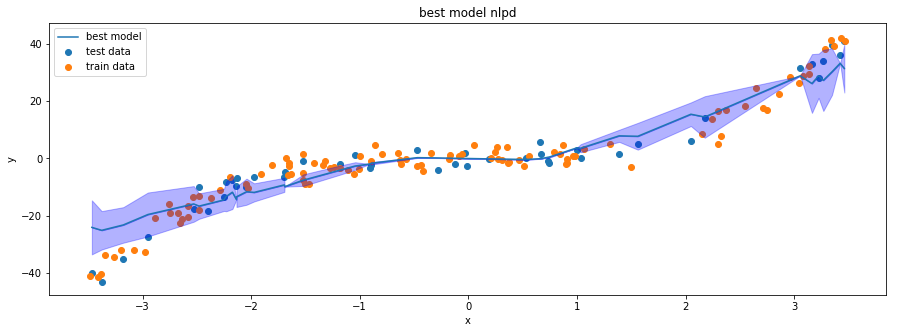

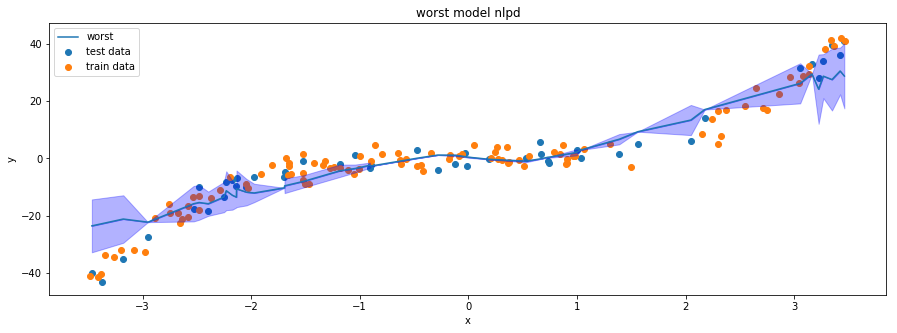

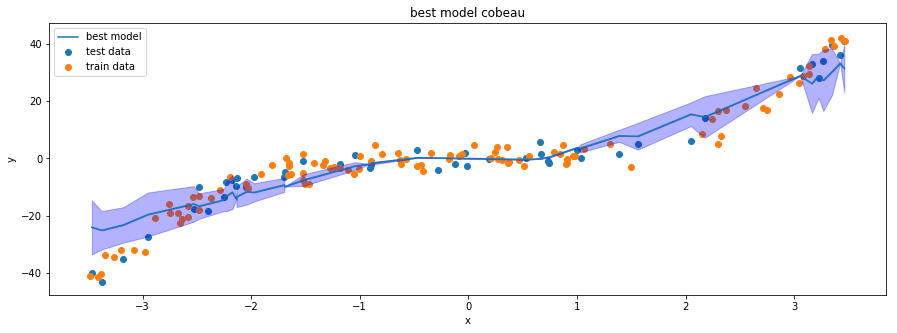

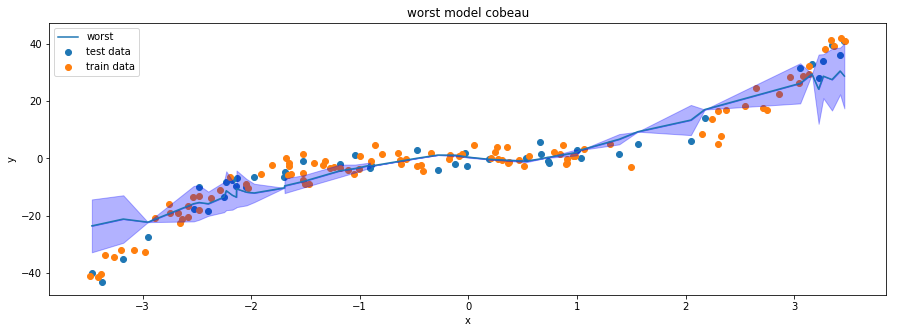

In [20]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-07 20:57:12.838729
experiment number 1 took 42.877888917922974 seconds. That means the whole run will probably take 214.38944458961487 more seconds and 3.5731574098269143 more minutes.
overall, it took 252.85805106163025 seconds with 5 experiments
             cobeau  coverage      nlpd        rsme
count  5.000000e+00       5.0  5.000000    5.000000
mean   1.095659e-02       1.0 -3.143241  184.483578
std    2.384578e-02       0.0  0.741261  131.584233
min    1.669946e-13       1.0 -4.186590   26.977837
25%    2.996253e-09       1.0 -3.359850   90.343205
50%    6.175823e-07       1.0 -3.146171  173.494179
75%    1.178902e-03       1.0 -2.875747  293.691375
max    5.360344e-02       1.0 -2.147845  337.911293
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &        rsme \\
\midrule
count &  5.000000e+00 &       5.0 &  5.000000 &    5.000000 \\
mean  &  1.095659e-02 &       1.0 & -3.143241 &  184.483578 \\
std   &  2.384578e-02 &    

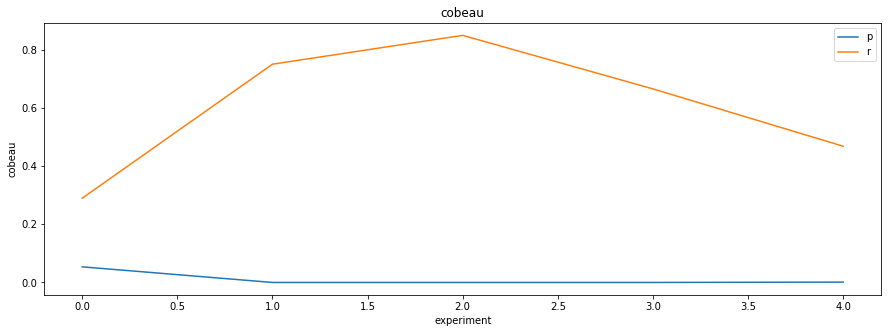

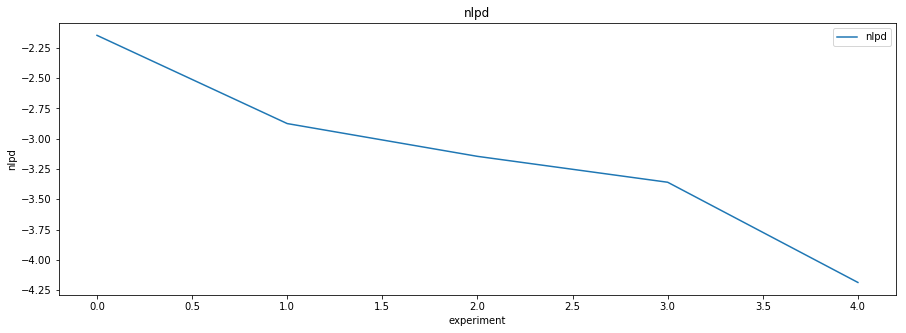

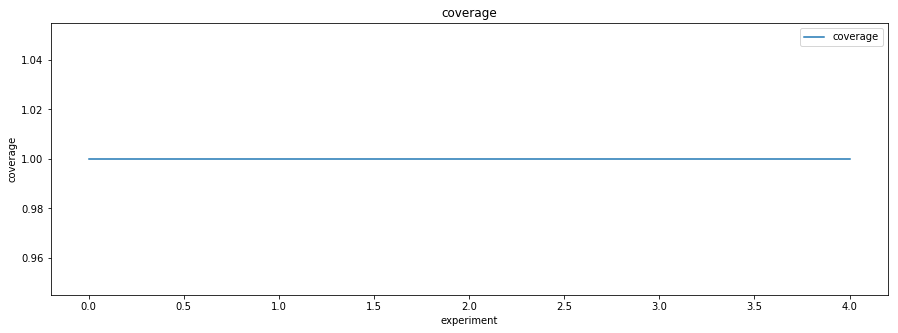

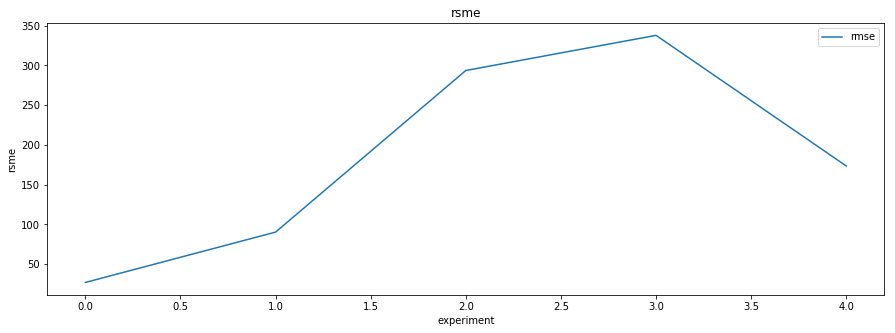

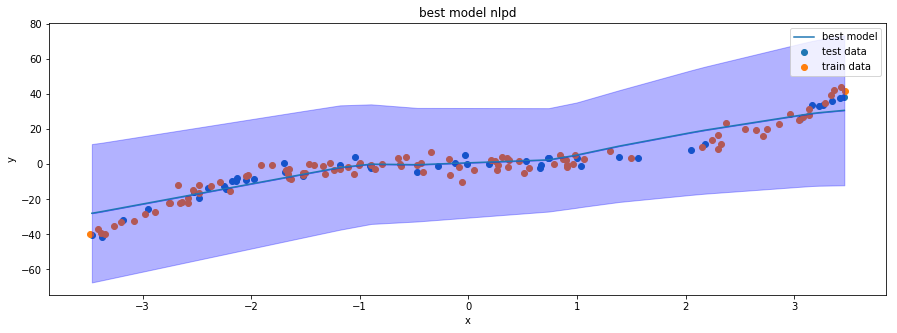

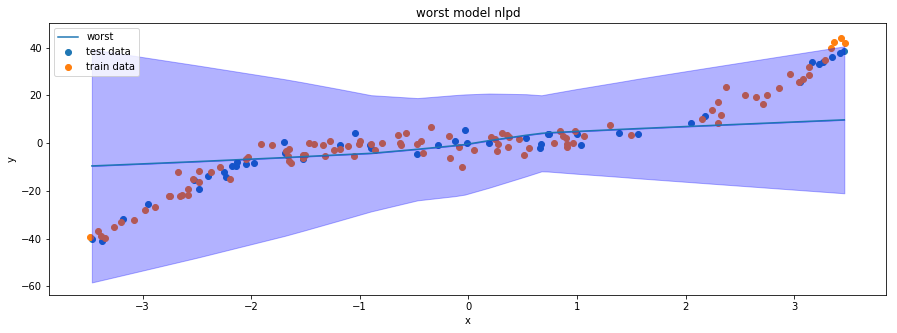

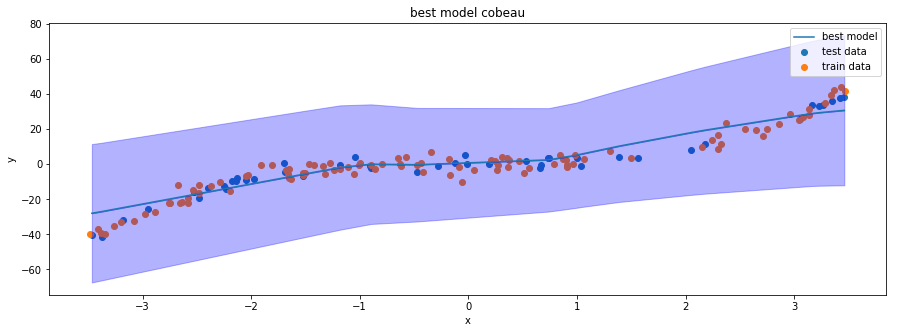

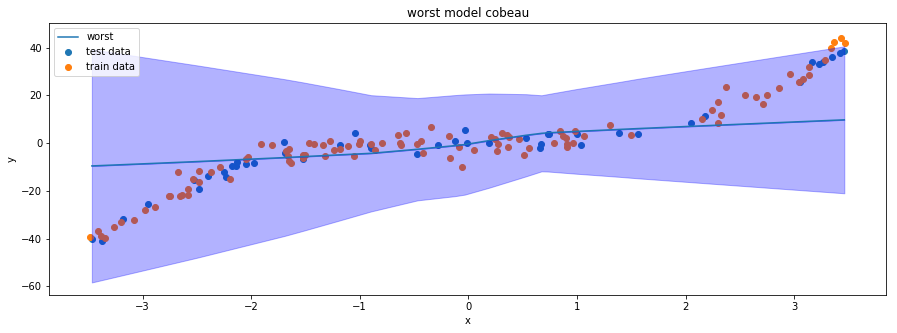

In [ ]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

In [ ]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-07 21:01:40.132821
